Классы: ['Androoper' 'Freed' 'Tempik']
Размер данных: (19, 2914)
              precision    recall  f1-score   support

   Androoper       1.00      1.00      1.00         1
       Freed       1.00      1.00      1.00         1
      Tempik       1.00      1.00      1.00         1

    accuracy                           1.00         3
   macro avg       1.00      1.00      1.00         3
weighted avg       1.00      1.00      1.00         3



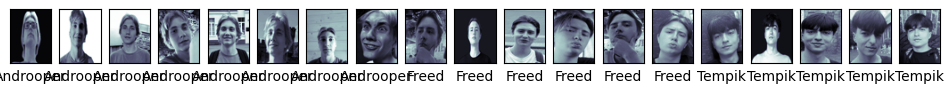

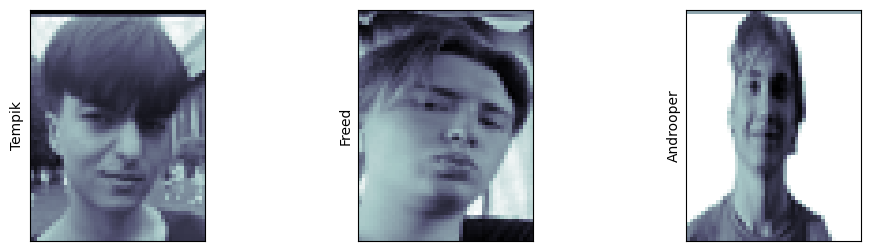

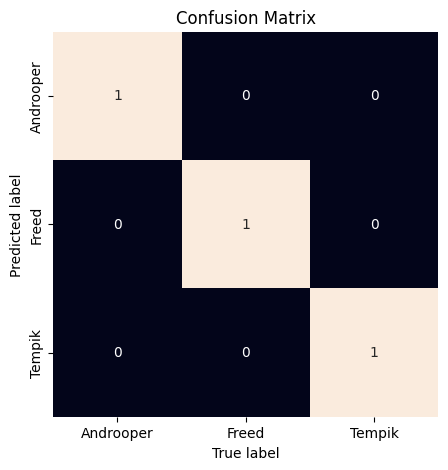

In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from sklearn.decomposition import PCA
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn.utils import Bunch
import seaborn as sns

dataset_dir = 'faces_dataset'  

def faces(dataset_dir, target_size=(62, 47)):
    images = []
    labels = []
    label_encoder = LabelEncoder()
    
    for label_folder in os.listdir(dataset_dir):
        label_path = os.path.join(dataset_dir, label_folder)
        if os.path.isdir(label_path):
            for filename in os.listdir(label_path):
                image_path = os.path.join(label_path, filename)
                if image_path.endswith('.jpg') or image_path.endswith('.png'):
                    image = Image.open(image_path).convert('L')  
                    image_resized = image.resize(target_size[::-1])  
                    images.append(np.array(image_resized).flatten())
                    labels.append(label_folder)
    
    labels = label_encoder.fit_transform(labels)
    return Bunch(data=np.array(images), target=np.array(labels), target_names=label_encoder.classes_)

faces = faces(dataset_dir)
print("Классы:", faces.target_names)
print("Размер данных:", faces.data.shape)

fig, ax = plt.subplots(1, len(faces.data), figsize=(12, 3))
for i, axi in enumerate(ax.flat):
    axi.imshow(faces.data[i].reshape(62, 47), cmap='bone')
    axi.set(xticks=[], yticks=[], xlabel=faces.target_names[faces.target[i]])



pca = PCA(n_components=2, whiten=True, random_state=42)

Xtrain, Xtest, ytrain, ytest = train_test_split(faces.data, faces.target,test_size=  3/ len(faces.data))

pca.fit(Xtrain)
Xtrain_pca = pca.transform(Xtrain)
Xtest_pca = pca.transform(Xtest)

clf = DecisionTreeClassifier(max_depth=5, max_features=0.7, class_weight='balanced')
clf.fit(Xtrain_pca, ytrain)
yfit = clf.predict(Xtest_pca)

fig, ax = plt.subplots(1, len(Xtest), figsize=(12, 3))
for i, axi in enumerate(ax.flat):
    axi.imshow(Xtest[i].reshape(62, 47), cmap='bone')
    axi.set(xticks=[], yticks=[])
    axi.set_ylabel(faces.target_names[yfit[i]].split()[-1],color='black' if yfit[i] == ytest[i] else 'red')


print(classification_report(ytest, yfit, target_names=faces.target_names))

mat = confusion_matrix(ytest, yfit)
plt.figure(figsize=(5, 5))
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=faces.target_names,
            yticklabels=faces.target_names)
plt.xlabel('True label')
plt.ylabel('Predicted label')
plt.title("Confusion Matrix")
plt.show()
